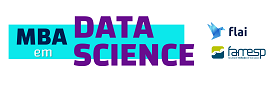

# **Preços das ações da Magalu**

## **Entendendo o contexto**

### **Mercado de Ações**

Em 2011 a Magazine Luiza, uma rede de lojas, que atuava no setor varejista, faz o pedido de IPO (“initial public offering”), que nada mais é do que a primeira vez que uma Empresa recebe novos sócios através de ofertas de ações ao público.

Uma Ação pode ser entendida como pequenas frações do patrimônio de uma Empresa, e que ao comprar uma Ação desta Empresa, o acionista passar a ser "Dono" de uma parte da Empresa.

Essa Ação pode ser negociada no Mercado de Ações, e assim, um investidor pode comprar uma ação por um preço X e vender por um preço Y, portanto, ele pode acabar lucrando, ou tendo prejuízo nessa negociação.

Todas as ações de empresas de capitais abertos são negociadas nas Bolsa de Valores, sendo que no Brasil tinha a BOVESPA - Bolsa de Valores de São Paulo, que se juntou a BM&F (mercados futuros) e à Cetip, formando assim a B3 – Brasil, Bolsa e Balcão, que atualmente monopoliza o mercado de capitais no Brasil e é a bolsa de valores oficial do Brasil.

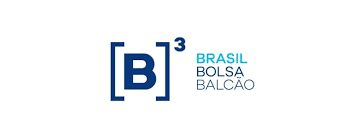

### **O Objetivo da Aula**

Contruir uma visualização dos valores das ações da Magalu.

### **O dataset**

Baseado em informações da B3 (Antiga BOVESPA), este conjunto de dados foi estruturado de forma que cada instância é um dia de determinado ano, e os atributos são indicadores de preços de ações da empresa Magalu:

- **Date:** Dia do ano;

- **Open:** Preço da ação no momento da abertura da bolsa no dia;

- **High:** Maior valor negociado no dia;

- **Low:** Menos valor negociado no dia;

- **Close:** Preço da ação no momento de fechamento da bolsa no dia;

- **Adj Close:** Preço de fechamento após ajustes;

- **Volume:** Volume de ações negociados no dia;

O conjunto de dados está disponível em um repositório no GitHub que pode ser acessado através do link:

- https://raw.githubusercontent.com/jonates/opendata/master/mercado_acoes/MGLU3.csv

No Site do Yahoo é possível consultar séries históricas de diversas ações. Confira no link:
- https://finance.yahoo.com/


### **A Biblioteca Plotly**

Plotly é uma biblioteca que fornece diversos gráficos dinâmicos e interativos.

Para maiores informações do Plotly, consulte a documentação no endereço a seguir:

- https://plotly.com/

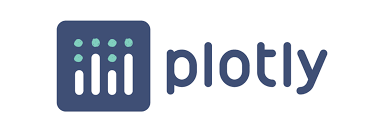

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [1]:
# Fazendo download do conjunto de dados
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/mercado_acoes/MGLU3.csv


--2022-04-27 06:56:42--  https://raw.githubusercontent.com/jonates/opendata/master/mercado_acoes/MGLU3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179079 (175K) [text/plain]
Saving to: ‘MGLU3.csv.2’

MGLU3.csv.2         100%[===================>] 174.88K  --.-KB/s    in 0.02s   

2022-04-27 06:56:42 (11.0 MB/s) - ‘MGLU3.csv.2’ saved [179079/179079]



In [2]:
# Importando o Pandas
import pandas as pd

In [3]:
# Importando o conjunto de dados com cotações das ações da Magalu
magalu = pd.read_csv(
    filepath_or_buffer = '/content/MGLU3.csv', 
    sep=',',
    decimal='.'
)

In [4]:
# Espiando o conjunto de dados
magalu

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-03,0.515625,0.521562,0.50625,0.509375,0.458950,33670400
1,2011-05-04,0.510000,0.515000,0.51000,0.515000,0.464018,39203200
2,2011-05-05,0.512812,0.512812,0.51000,0.511875,0.461202,35097600
3,2011-05-06,0.510937,0.511875,0.50000,0.508125,0.457824,38672000
4,2011-05-09,0.506562,0.507812,0.50125,0.503125,0.453319,667680
...,...,...,...,...,...,...,...
2714,2022-04-08,6.350000,6.360000,6.08000,6.130000,6.130000,143068000
2715,2022-04-11,5.950000,6.200000,5.84000,6.080000,6.080000,100404000
2716,2022-04-12,6.320000,6.400000,5.96000,5.970000,5.970000,115503700
2717,2022-04-13,6.080000,6.170000,5.93000,6.030000,6.030000,101627200


### **Espiando a estrutura dos dados**

In [5]:
# Informacoes gerais do conjunto de dados
magalu.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2719 non-null   object 
 1   Open       2719 non-null   float64
 2   High       2719 non-null   float64
 3   Low        2719 non-null   float64
 4   Close      2719 non-null   float64
 5   Adj Close  2719 non-null   float64
 6   Volume     2719 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.8+ KB


In [6]:
# Verificando valores missing
magalu.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### **Transformações no Conjunto de dados**

In [7]:
# Transformação Data em formato de data
magalu['Date'] = pd.to_datetime(magalu.Date, infer_datetime_format=True) 

In [8]:
# Informacoes gerais do conjunto de dados
magalu.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2719 non-null   datetime64[ns]
 1   Open       2719 non-null   float64       
 2   High       2719 non-null   float64       
 3   Low        2719 non-null   float64       
 4   Close      2719 non-null   float64       
 5   Adj Close  2719 non-null   float64       
 6   Volume     2719 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 148.8 KB


In [ ]:
# Colocando a Data como índice do dataset, conforme uma série temporal
magalu.set_index(keys = 'Date', inplace = True)

In [11]:
# Informacoes gerais do conjunto de dados
magalu.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2719 entries, 2011-05-03 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2719 non-null   float64
 1   High       2719 non-null   float64
 2   Low        2719 non-null   float64
 3   Close      2719 non-null   float64
 4   Adj Close  2719 non-null   float64
 5   Volume     2719 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.7 KB


In [12]:
# Espiando o conjunto de dados
magalu

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-03,0.515625,0.521562,0.50625,0.509375,0.458950,33670400
2011-05-04,0.510000,0.515000,0.51000,0.515000,0.464018,39203200
2011-05-05,0.512812,0.512812,0.51000,0.511875,0.461202,35097600
2011-05-06,0.510937,0.511875,0.50000,0.508125,0.457824,38672000
2011-05-09,0.506562,0.507812,0.50125,0.503125,0.453319,667680
...,...,...,...,...,...,...
2022-04-08,6.350000,6.360000,6.08000,6.130000,6.130000,143068000
2022-04-11,5.950000,6.200000,5.84000,6.080000,6.080000,100404000
2022-04-12,6.320000,6.400000,5.96000,5.970000,5.970000,115503700


### **Gráfico estilo Bovespa**

In [13]:
# Importando as bibliotecas necessarias
import plotly.graph_objects as go


In [14]:
# Criando o gráfico
grafico_estilo_bovespa = go.Figure(
    data=[
          go.Candlestick(
              x= magalu.index,
              open = magalu['Open'], 
              high = magalu['High'], 
              low = magalu['Low'], 
              close = magalu['Close']
          )
    ]
) 

# Esconder o Controlador de delimitação da linha do tempo
grafico_estilo_bovespa.update_layout( xaxis_rangeslider_visible = False )

# Exibir o Gráfico
grafico_estilo_bovespa.show()

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa um gráfico com a biblioteca plotly utilizando o método Candlestick, para visualizar informações dos preços de ações da Petróleo Brasileiro S.A. - Petrobras (PETR4.SA).

O conjunto de dados está disponível para download no link:
- https://raw.githubusercontent.com/jonates/opendata/master/mercado_acoes/PETR4.csv